In [199]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from data import RGBTileDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
from torch import Tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


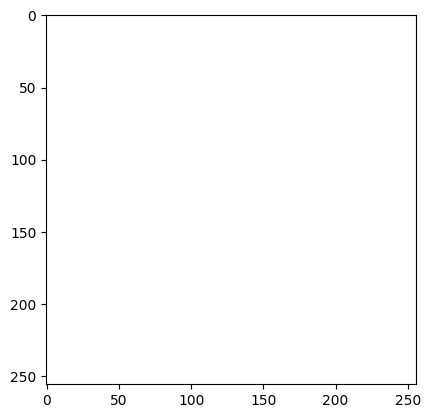

In [200]:
label_path = "/home/foti/aerial/thesis/dataset/melbourne/rgb_data/train/Tile_+003_+005_0_3.png"
label = Image.open(label_path).convert("RGB")
plt.imshow(Tensor(np.array(label)))

In [201]:
ia.seed(1)

In [204]:
train_dataset = RGBTileDataset(dataset="melbourne", image_set="train")
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
images = next(iter(train_dataloader))[1]
images

tensor([[[[-0.3198, -0.1828, -0.0629,  ..., -0.2513, -0.2856, -0.1999],
          [-0.3541, -0.2856, -0.1828,  ..., -0.2342, -0.3369, -0.1999],
          [-0.2171, -0.2513, -0.2342,  ..., -0.2171, -0.0629, -0.1999],
          ...,
          [ 0.8961,  1.2899,  1.1700,  ..., -0.5938, -0.4568, -0.3712],
          [ 1.0844,  1.1700,  1.0502,  ..., -0.5938, -0.4739, -0.4226],
          [ 1.2728,  1.2728,  1.3584,  ..., -0.5424, -0.4739, -0.4226]],

         [[ 0.3978,  0.4853,  0.5728,  ...,  0.5028,  0.4853,  0.5728],
          [ 0.4153,  0.3978,  0.4853,  ...,  0.5378,  0.4503,  0.5728],
          [ 0.5553,  0.4678,  0.5028,  ...,  0.5378,  0.7129,  0.5728],
          ...,
          [ 0.9055,  1.2556,  1.1506,  ...,  0.2052,  0.4153,  0.5203],
          [ 1.0805,  1.1506,  1.0455,  ...,  0.2227,  0.3803,  0.4678],
          [ 1.3081,  1.3606,  1.2906,  ...,  0.2927,  0.3627,  0.4328]],

         [[-0.2532, -0.1312, -0.0092,  ..., -0.1835, -0.1487, -0.0964],
          [-0.2532, -0.2532, -

In [205]:
images

tensor([[[[-0.3198, -0.1828, -0.0629,  ..., -0.2513, -0.2856, -0.1999],
          [-0.3541, -0.2856, -0.1828,  ..., -0.2342, -0.3369, -0.1999],
          [-0.2171, -0.2513, -0.2342,  ..., -0.2171, -0.0629, -0.1999],
          ...,
          [ 0.8961,  1.2899,  1.1700,  ..., -0.5938, -0.4568, -0.3712],
          [ 1.0844,  1.1700,  1.0502,  ..., -0.5938, -0.4739, -0.4226],
          [ 1.2728,  1.2728,  1.3584,  ..., -0.5424, -0.4739, -0.4226]],

         [[ 0.3978,  0.4853,  0.5728,  ...,  0.5028,  0.4853,  0.5728],
          [ 0.4153,  0.3978,  0.4853,  ...,  0.5378,  0.4503,  0.5728],
          [ 0.5553,  0.4678,  0.5028,  ...,  0.5378,  0.7129,  0.5728],
          ...,
          [ 0.9055,  1.2556,  1.1506,  ...,  0.2052,  0.4153,  0.5203],
          [ 1.0805,  1.1506,  1.0455,  ...,  0.2227,  0.3803,  0.4678],
          [ 1.3081,  1.3606,  1.2906,  ...,  0.2927,  0.3627,  0.4328]],

         [[-0.2532, -0.1312, -0.0092,  ..., -0.1835, -0.1487, -0.0964],
          [-0.2532, -0.2532, -

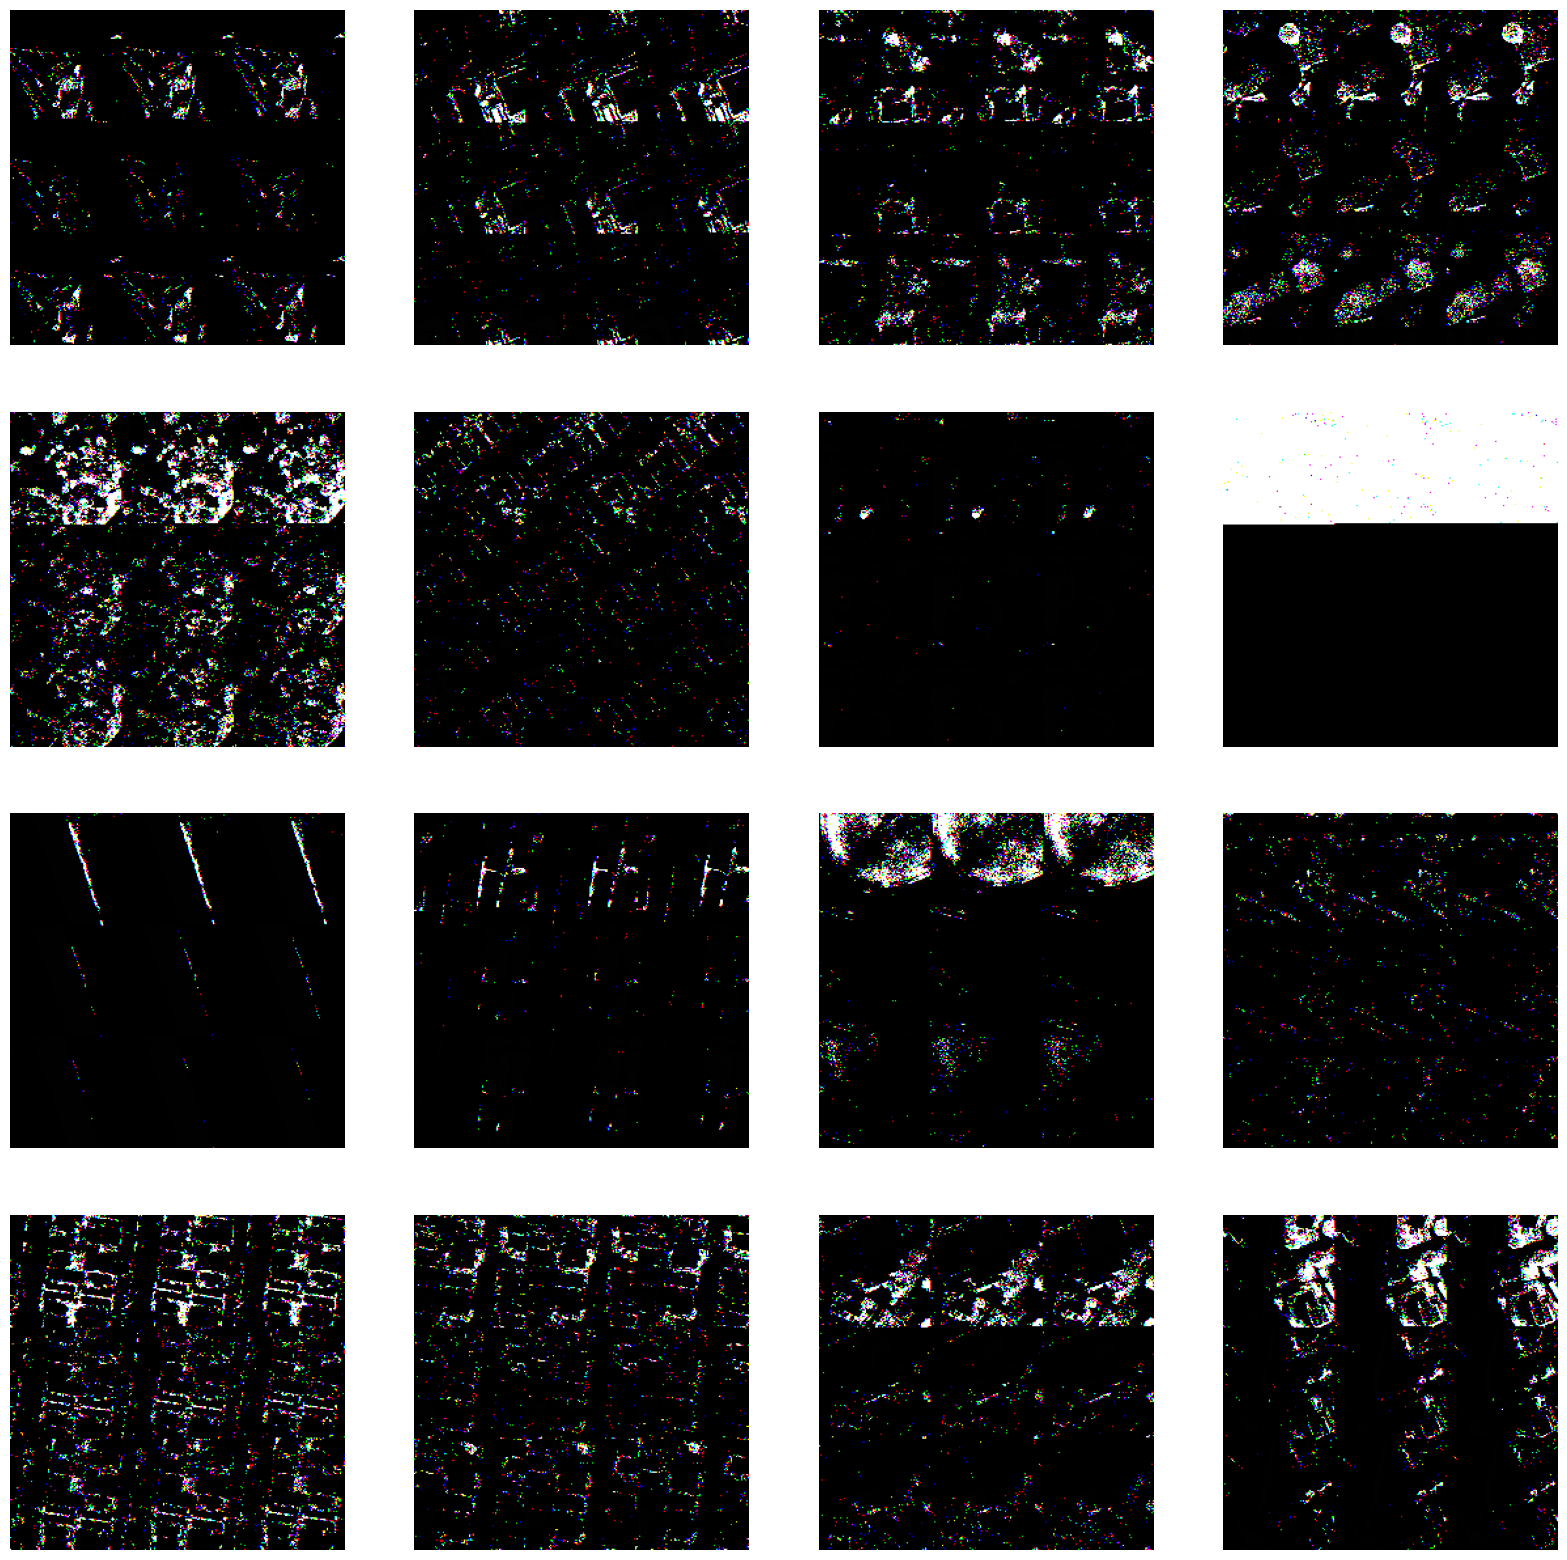

In [206]:
show_images(images.numpy())

In [207]:
seq = iaa.Sequential([
    iaa.Rotate((-180, 180))
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)

AttributeError: 'Tensor' object has no attribute 'deepcopy'

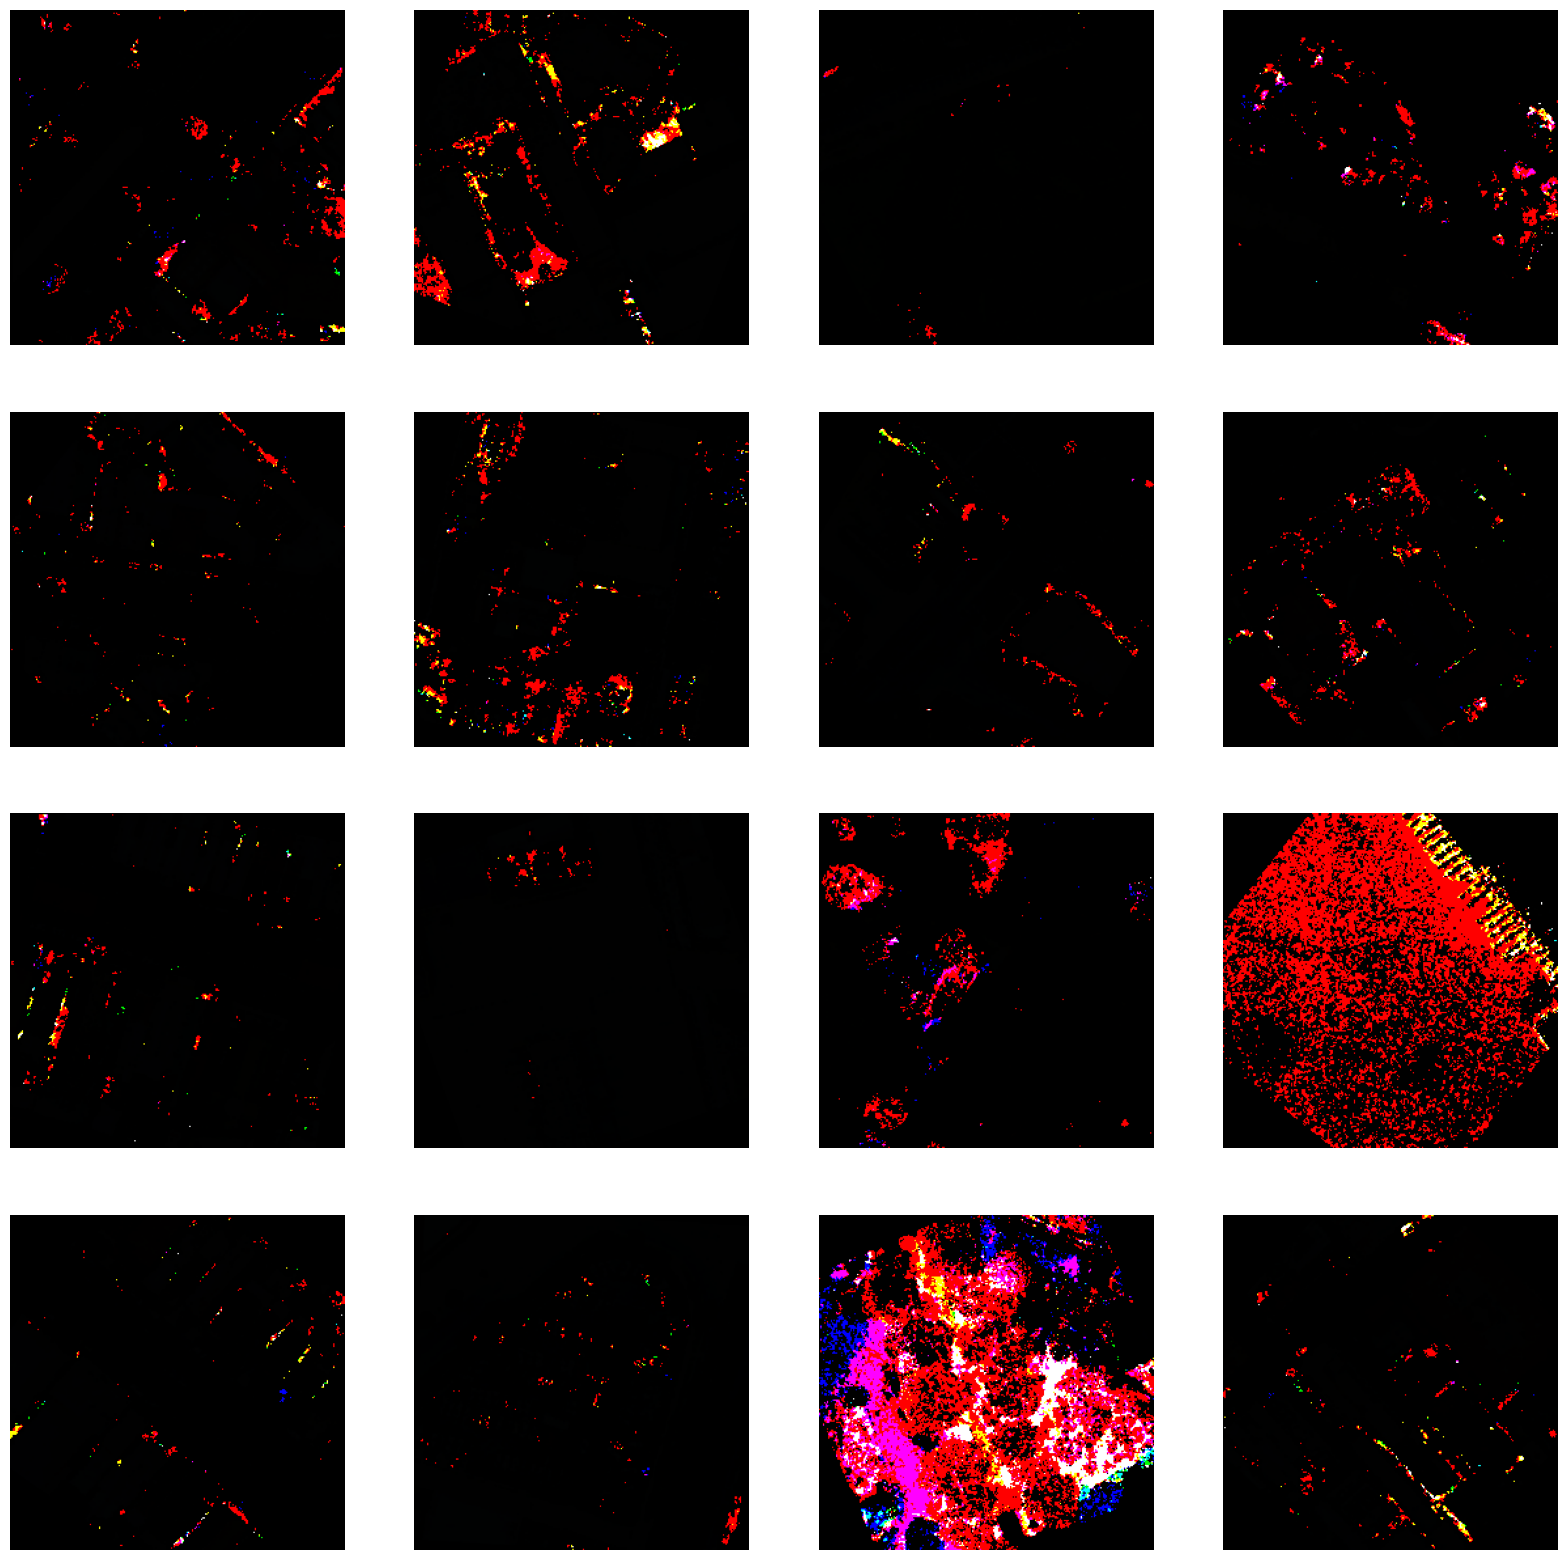

In [208]:
# Plot the images
def show_images(images, cols=4, figsize=(20, 20)):
    rows = len(images) // cols
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axs.flat):
        # Transpose the image from (3, 256, 256) to (256, 256, 3)
        img = images[i].reshape(256, 256, 3).astype(np.uint8)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Display the augmented images
show_images(images_aug)